<h1><center>Convolutional Neural Networks</center></h1>

A Convolutional neural network (CNN) is a neural network that has one or more convolutional layers and are used mainly for image processing, classification, segmentation and also for other auto correlated data.

A convolution is essentially sliding a filter over the input. One helpful way to think about convolutions is this quote from Dr Prasad Samarakoon: “A convolution can be thought as “looking at a function’s surroundings to make better/accurate predictions of its outcome.”

Rather than looking at an entire image at once to find certain features it can be more effective to look at smaller portions of the image.


<h3>Common Uses for CNNs</h3>

The most common use for CNNs is image classification, for example identifying satellite images that contain roads or classifying hand written letters and digits. There are other quite mainstream tasks such as image segmentation and signal processing, for which CNNs perform well at.

`CNNs have been used for understanding in Natural Language Processing (NLP) and speech recognition, although often for NLP Recurrent Neural Nets (RNNs) are used.`

A CNN can also be implemented as a U-Net architecture, which are essentially two almost mirrored CNNs resulting in a CNN whose architecture can be presented in a U shape. U-nets are used where the output needs to be of similar size to the input such as segmentation and image improvement.

<h3>Interesting uses for CNNs other than image processing</h3>

More and more diverse and interesting uses are being found for CNN architectures. An example of a non-image based application is [“The Unreasonable Effectiveness of Convolutional Neural Networks in Population Genetic Inference”](https://pubmed.ncbi.nlm.nih.gov/30517664/) by Lex Flagel et al. This is used to perform selective sweeps, finding gene flow, inferring population size changes, inferring rate of recombination.

There are researchers such as Professor Gerald Quon at the [Quon-titative biology lab](https://qlab.faculty.ucdavis.edu/publications/), using CNNs for generative models in single cell genomics for disease identification.

CNNs are also being used in astrophysics to interpret radio telescope data to predict the likely visual image to represent the data.

[Deepmind’s WaveNet](https://deepmind.com/blog/article/wavenet-generative-model-raw-audio) is a CNN model for generating synthesized voice, used as the basis for Google’s Assistant’s voice synthesizer.

In [1]:
import os                                                       #library untuk import data dari directory
import cv2                                                      #library untuk olah citra
import matplotlib.pyplot as plt                                 #plot
import numpy as np                                              #operasi matriks

from keras.utils import to_categorical                          #encode to categorical(kalau pakai categorical_crossentropy)
from keras.models import Sequential, load_model                 #create a sequential n load model
from keras import layers, Input                                 #import dense, conv2d, flatten layer, MaxPooling2D

<h3>Fungsi untuk import data gambar dari direktori</h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#resize gambar ke 200 x 200 px
IMG_WIDTH= 200
IMG_HEIGHT= 200

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float')
            image /= 255                    #normalisasi
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

<h3>Untuk memanggil fungsi 'create dataset'</h3>

In [4]:
img_data, class_name = create_dataset(r'/content/drive/MyDrive/Neural Network/dataset/Data Otak')

Dimensi img_data:  (70, 200, 200, 3)


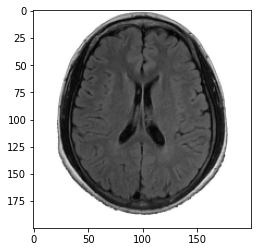

In [5]:
print('Dimensi img_data: ',np.shape(img_data))
plt.imshow(img_data[0])

In [6]:
img_data[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

<h3>Pelabelan data</h3>

Dengan code berikut, kita akan mengambil nama dari setiap folder lalu kita labelkan '0' untuk Normal dan '1' untuk Sakit

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Normal': 0, 'Sakit': 1}

In [8]:
target_val =  [target_dict[class_name[i]] for i in range(len(class_name))]
banyak_data = sum(target_val[i]==0 for i in range(len(target_val)))

#bagi data train sebanyak 75% dan 25% data tes
n_train = round(banyak_data*0.75)
n_tes   = len(target_val)-n_train

In [11]:
target_val

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [12]:
X_train = np.concatenate((img_data[0:n_train],img_data[40:n_train+40]))
Y_train = np.concatenate((target_val[0:n_train],target_val[40:n_train+40]))

X_test  = np.concatenate((img_data[n_train:40],img_data[n_train+40:]))
Y_test  = np.concatenate((target_val[n_train:40],target_val[n_train+40:]))

<h3>Pembuatan Model CNN</h3>

Pada tahap ini, kita akan menggunakan package Keras untuk membuat model CNN

In [13]:
#create model
model = Sequential([
    Input(shape=(IMG_HEIGHT,IMG_WIDTH, 3),name='input')
])
#add model layers
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(1, activation='softmax',name='output'))

In [14]:
bobot_layer1 = model.layers[0].get_weights()[0]
bias_layer1  = model.layers[0].get_weights()[1]

#bobot_layer2 = model.layers[1].get_weights()[0] #kosong karena layer maxpooling
#bias_layer2  = model.layers[1].get_weights()[1] #kosong karena layer maxpooling

bobot_layer3 = model.layers[2].get_weights()[0]
bias_layer3  = model.layers[2].get_weights()[1]

#bobot_layer4 = model.layers[3].get_weights()[0] #kosong karena layer flatten
#bias_layer4  = model.layers[3].get_weights()[1] #kosong karena layer flatten

bobot_layer5 = model.layers[4].get_weights()[0]
bias_layer5  = model.layers[4].get_weights()[1]

bobot_layer6 = model.layers[5].get_weights()[0]
bias_layer6  = model.layers[5].get_weights()[1]

In [15]:
print('ukuran bobot layer ke-1: ',model.layers[0].get_weights()[0].shape)
print('ukuran bias layer ke-1: ',model.layers[0].get_weights()[1].shape)

print('ukuran bobot layer ke-3: ',model.layers[2].get_weights()[0].shape)
print('ukuran bias layer ke-3: ',model.layers[2].get_weights()[1].shape)

print('ukuran bobot layer ke-5: ',model.layers[4].get_weights()[0].shape)
print('ukuran bias layer ke-5: ',model.layers[4].get_weights()[1].shape)

print('ukuran bobot layer ke-6: ',model.layers[5].get_weights()[0].shape)
print('ukuran bias layer ke-6: ',model.layers[5].get_weights()[1].shape)

ukuran bobot layer ke-1:  (3, 3, 3, 64)
ukuran bias layer ke-1:  (64,)
ukuran bobot layer ke-3:  (3, 3, 64, 32)
ukuran bias layer ke-3:  (32,)
ukuran bobot layer ke-5:  (301088, 20)
ukuran bias layer ke-5:  (20,)
ukuran bobot layer ke-6:  (20, 1)
ukuran bias layer ke-6:  (1,)


In [16]:
#inisialisasi bobot (manual) jika ingin memakai optimasi (e.g. Algoritma Genetika)
bobot_layer1_init = np.random.rand(3,3,3,64)
bias_layer1_init  = np.random.rand(64)
model.layers[0].set_weights([bobot_layer1_init,bias_layer1_init])

bobot_layer3_init = np.random.rand(3,3,64,32)
bias_layer3_init  = np.random.rand(32)
model.layers[2].set_weights([bobot_layer3_init,bias_layer3_init])

bobot_layer5_init = np.random.rand(301088,20)
bias_layer5_init  = np.random.rand(20)
model.layers[4].set_weights([bobot_layer5_init,bias_layer5_init])

bobot_layer6_init = np.random.rand(20,1)
bias_layer6_init  = np.random.rand(1)
model.layers[5].set_weights([bobot_layer6_init,bias_layer6_init])

In [17]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 4.5640 - accuracy: 0.5104 - val_loss: 2.8569 - val_accuracy: 0.6923
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 4.5435 - accuracy: 0.5104 - val_loss: 2.8440 - val_accuracy: 0.6923
Epoch 3/10
2/2 [==============================] - 3s 1s/step - loss: 4.5230 - accuracy: 0.5104 - val_loss: 2.8311 - val_accuracy: 0.6923
Epoch 4/10
2/2 [==============================] - 3s 1s/step - loss: 4.3102 - accuracy: 0.5312 - val_loss: 2.8183 - val_accuracy: 0.6923
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 4.6735 - accuracy: 0.4896 - val_loss: 2.8055 - val_accuracy: 0.6923
Epoch 6/10
2/2 [==============================] - 3s 1s/step - loss: 4.5571 - accuracy: 0.5000 - val_loss: 2.7929 - val_accuracy: 0.6923
Epoch 7/10
2/2 [==============================] - 3s 1s/step - loss: 4.4416 - accuracy: 0.5104 - val_loss: 2.7802 - val_accuracy: 0.6923
Epoch 8/10
2/2 [=========================

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 301088)            0         
_________________________________________________________________
dense (Dense)                (None, 20)                6021780   
_________________________________________________________________
output (Dense)               (None, 1)                 21        
Total params: 6,042,057
Trainable params: 6,042,057
Non-trainable params: 0
______________________________________________

In [19]:
#ambil bobot setelah training

bobot_layer1_after = model.layers[0].get_weights()[0]
bias_layer1_after  = model.layers[0].get_weights()[1]

#bobot_layer2_after = model.layers[1].get_weights()[0] #kosong karena layer maxpooling
#bias_layer2_after  = model.layers[1].get_weights()[1] #kosong karena layer maxpooling

bobot_layer3_after = model.layers[2].get_weights()[0]
bias_layer3_after  = model.layers[2].get_weights()[1]

#bobot_layer4_after = model.layers[3].get_weights()[0] #kosong karena layer flatten
#bias_layer4_after  = model.layers[3].get_weights()[1] #kosong karena layer flatten

bobot_layer5_after = model.layers[4].get_weights()[0]
bias_layer5_after  = model.layers[4].get_weights()[1]

bobot_layer6_after = model.layers[5].get_weights()[0]
bias_layer6_after  = model.layers[5].get_weights()[1]

### Save model

In [ ]:
model.save('./Model/CNN') #save model

INFO:tensorflow:Assets written to: ./Model/CNN\assets


## Load model

In [ ]:
model_new = load_model('./Model/CNN') #load model

<h3>Untuk prediksi data</h3>

In [ ]:
Ytrain_pred = model.predict_classes(X_train) #memprediksi
Ytest_pred = model.predict_classes(X_test) #memprediksi
print(Ytrain_pred.flatten())
print(Ytest_pred.flatten())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
np.round(model.predict(X_train)).flatten()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

### Hitung Akurasi

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,Ytrain_pred)

array([[ 0, 22],
       [ 0, 22]], dtype=int64)

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_train,Ytrain_pred).flatten()
print('TN: ',tn,'FP: ',fp,'FN: ',fn,'TP: ',tp)

TN:  0 FP:  22 FN:  0 TP:  22


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,Ytrain_pred)

0.5

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Ytest_pred)

0.6923076923076923